# Problem statement - Predicting Term Deposit Subscription by a client

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [57]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [58]:
df= pd.read_csv("D:/Imarticus/Datasets/bank-additional-full.csv",delimiter=';')

In [59]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39421,53,technician,married,university.degree,no,unknown,unknown,cellular,apr,thu,758,2,999,2,failure,-1.8,93.749,-34.6,0.640,5008.7,yes
21913,60,retired,married,university.degree,no,no,no,cellular,aug,wed,332,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
39825,26,entrepreneur,single,high.school,no,no,no,telephone,jun,tue,49,1,999,0,nonexistent,-1.7,94.055,-39.8,0.713,4991.6,no
22411,59,admin.,married,professional.course,no,yes,no,cellular,aug,fri,34,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3089,31,admin.,married,high.school,no,no,yes,telephone,may,thu,349,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
11637,34,admin.,married,university.degree,no,yes,no,telephone,jun,fri,22,5,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
5064,54,management,married,basic.4y,no,no,no,telephone,may,fri,92,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30722,44,blue-collar,married,basic.9y,no,yes,yes,cellular,may,tue,180,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
17170,39,admin.,married,high.school,no,no,no,cellular,jul,fri,184,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3282,37,services,married,high.school,no,no,no,telephone,may,thu,200,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [60]:
df.shape

(41188, 21)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [62]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [63]:
for i in df.columns:
    print(i,'-',df[i].unique())

age - [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job - ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital - ['married' 'single' 'divorced' 'unknown']
education - ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default - ['no' 'unknown' 'yes']
housing - ['no' 'yes' 'unknown']
loan - ['no' 'yes' 'unknown']
contact - ['telephone' 'cellular']
month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week - ['mon' 'tue' 'wed' 'thu' 'fri']
duration - [ 261  149  226 ... 1246 1556 1868]
campaign - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

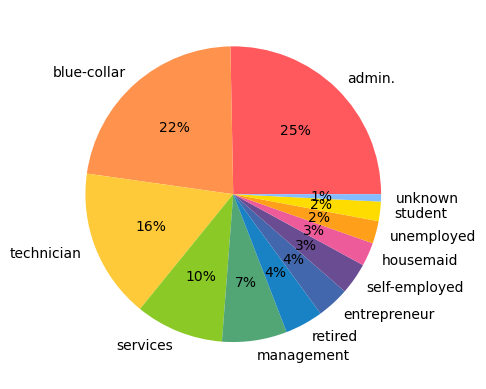

In [64]:
colors = ['#ff595e', '#ff924c', '#ffca3a', '#8ac926', '#52a675', '#1982c4',
          '#4267ac', '#6a4c93', '#ee5b9a', '#ff9f1a', '#ffdc00', '#83bcff']
freq=df['job'].value_counts()
count=freq.to_list()
keys = freq.keys().to_list()
plt.pie(x=count,labels=keys,autopct='%1.0f%%',colors=colors)
plt.show()

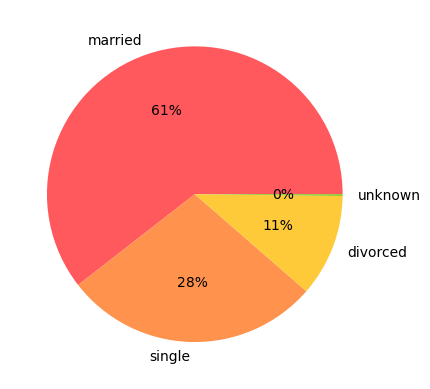

In [65]:
#colors = ["#8ac926","#540d6e", "#ffca3a","#ffd23f" ]

fcolors = ["#3bceac","#540d6e","#ee4266","#ffd23f"]
freq=df['marital'].value_counts()
count=freq.to_list()
keys = freq.keys().to_list()
plt.pie(x=count,labels=keys,autopct='%1.0f%%',colors=colors)
plt.show()

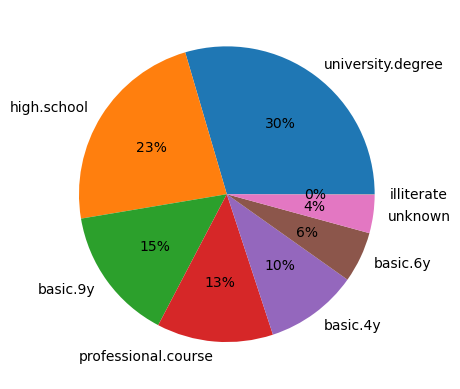

In [66]:
freq=df['education'].value_counts()
count=freq.to_list()
keys = freq.keys().to_list()
plt.pie(x=count,labels=keys,autopct='%1.0f%%')
plt.show()

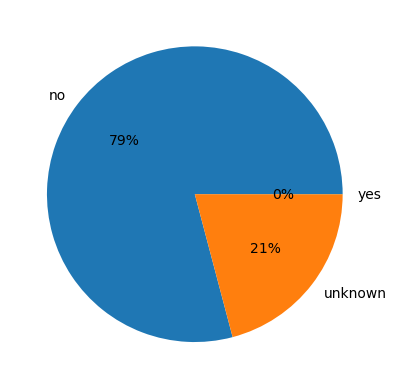

In [67]:
freq=df['default'].value_counts()
count=freq.to_list()
keys = freq.keys().to_list()
plt.pie(x=count,labels=keys,autopct='%1.0f%%')
plt.show()

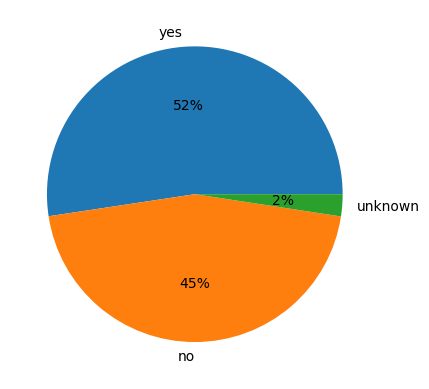

In [68]:
freq=df['housing'].value_counts()
count=freq.to_list()
keys = freq.keys().to_list()
plt.pie(x=count,labels=keys,autopct='%1.0f%%')
plt.show()

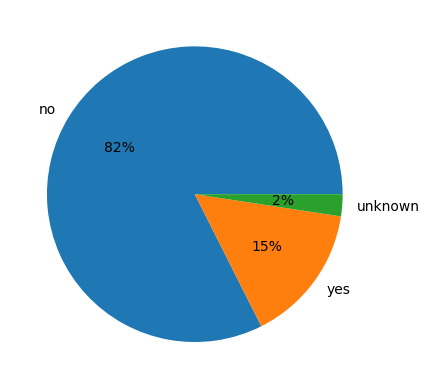

In [69]:
freq=df['loan'].value_counts()
count=freq.to_list()
keys = freq.keys().to_list()
plt.pie(x=count,labels=keys,autopct='%1.0f%%')
plt.show()

In [70]:
cols = ['job', 'marital', 'education', 'housing', 'loan']

for i in cols:
    mode = df[i].mode()[0]
    print(i,'-',mode)
    df[i] = df[i].replace('unknown',mode)
    print(df[i].unique(),'\n')

job - admin.
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student'] 

marital - married
['married' 'single' 'divorced'] 

education - university.degree
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate'] 

housing - yes
['no' 'yes'] 

loan - no
['no' 'yes'] 



In [71]:
df['pdays'] = df['pdays'].replace(999,0)

In [72]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [73]:
duplicates = df.duplicated()
df[duplicates]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,university.degree,no,no,no,telephone,jul,thu,88,1,0,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,0,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,0,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,0,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [74]:
df = df.drop_duplicates()

In [75]:
df.shape

(41176, 21)

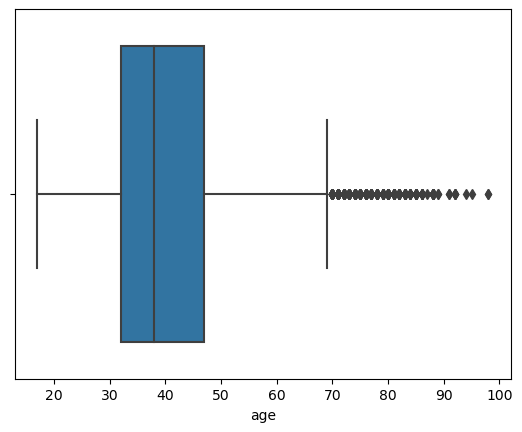

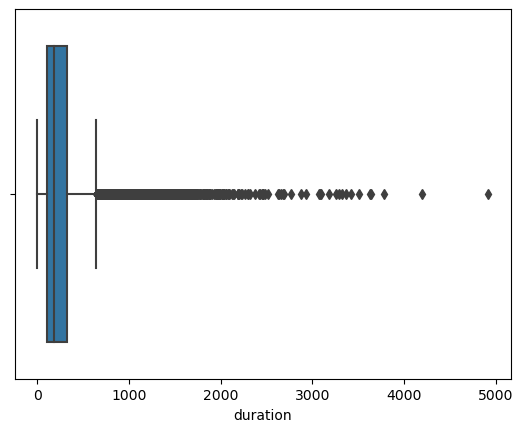

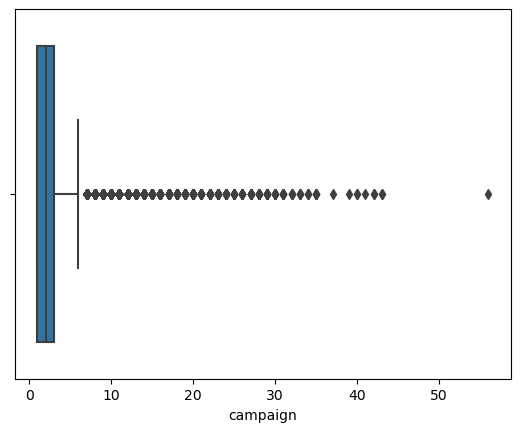

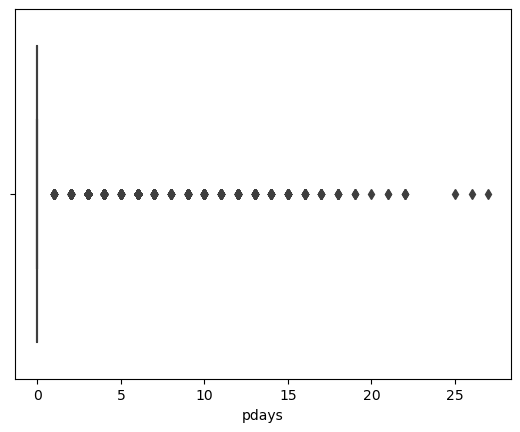

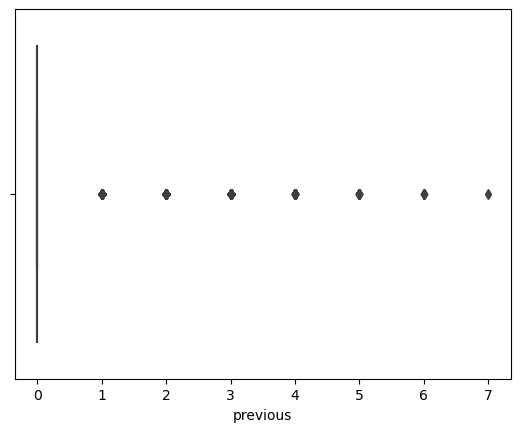

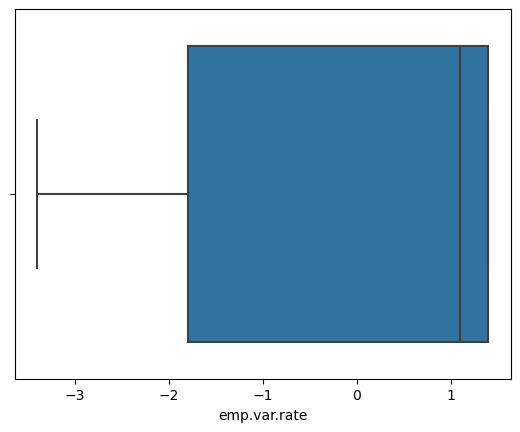

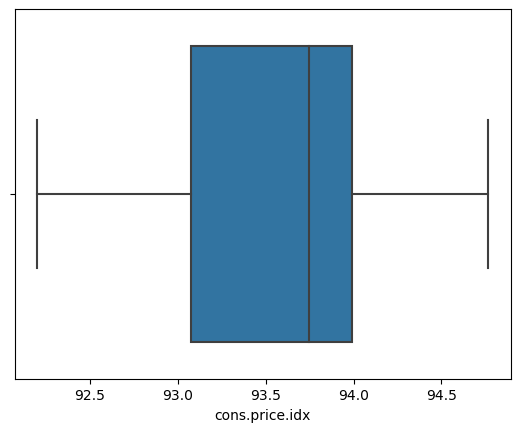

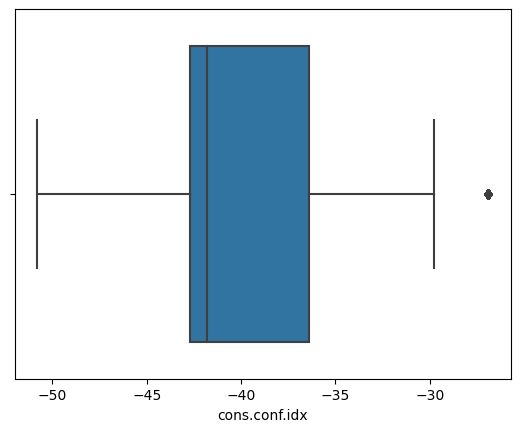

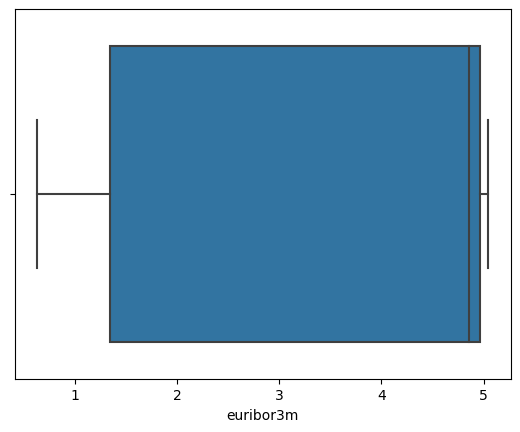

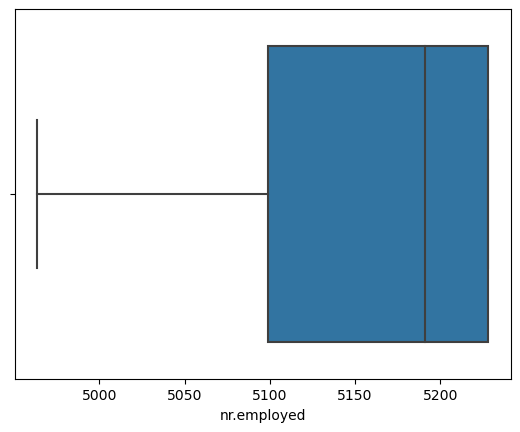

In [76]:
df1=df.select_dtypes(exclude=['object'])
for i in df1:
        plt.figure()
        sns.boxplot(data =df1, x=i)

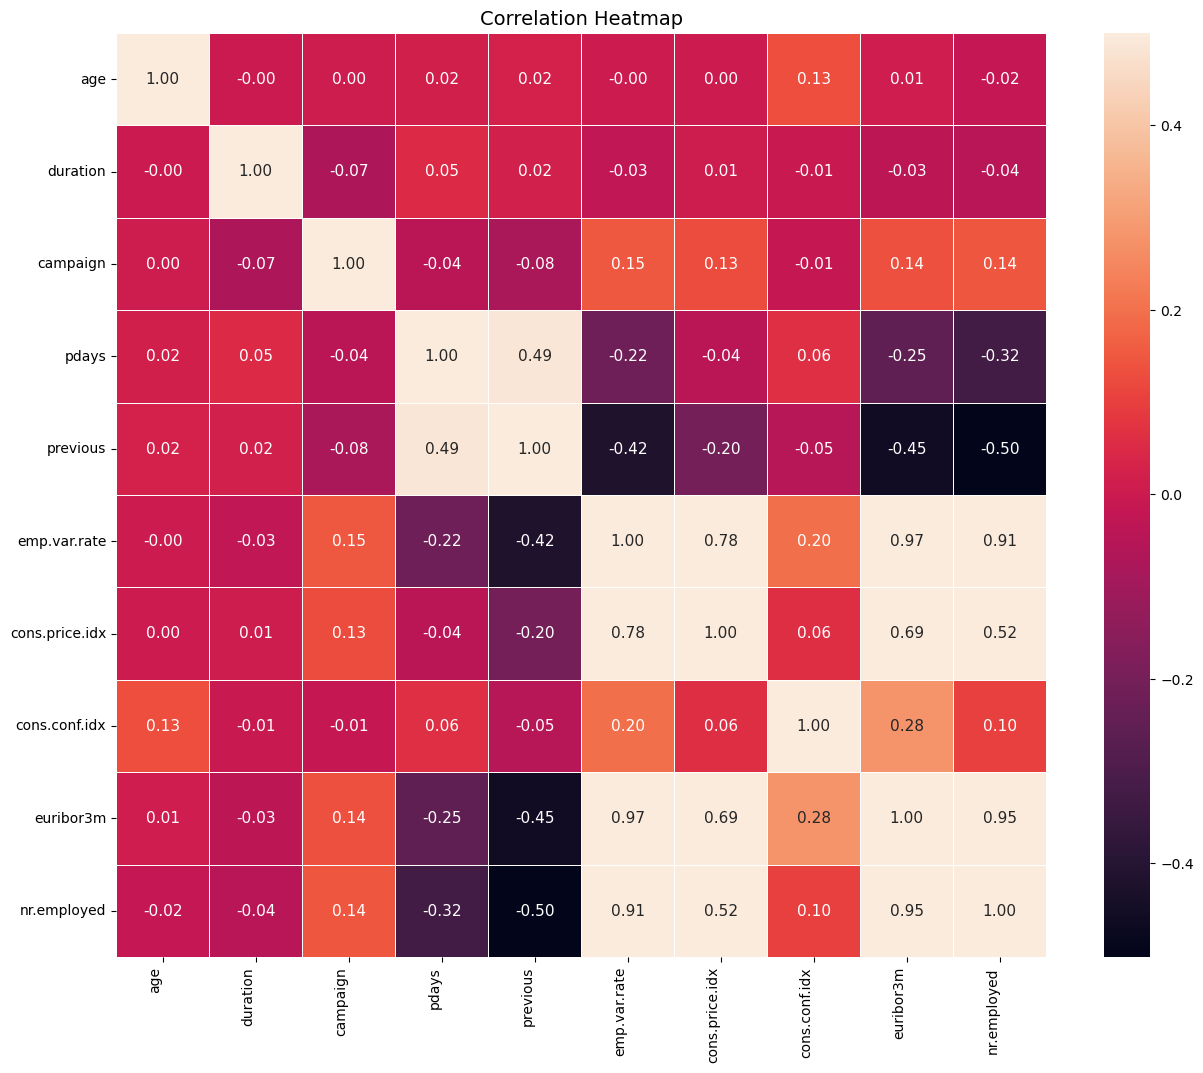

In [77]:
plt.figure(figsize=(15, 12))  # Set the figure size
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5,vmax=0.5,annot_kws={'fontsize':11})
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.show()

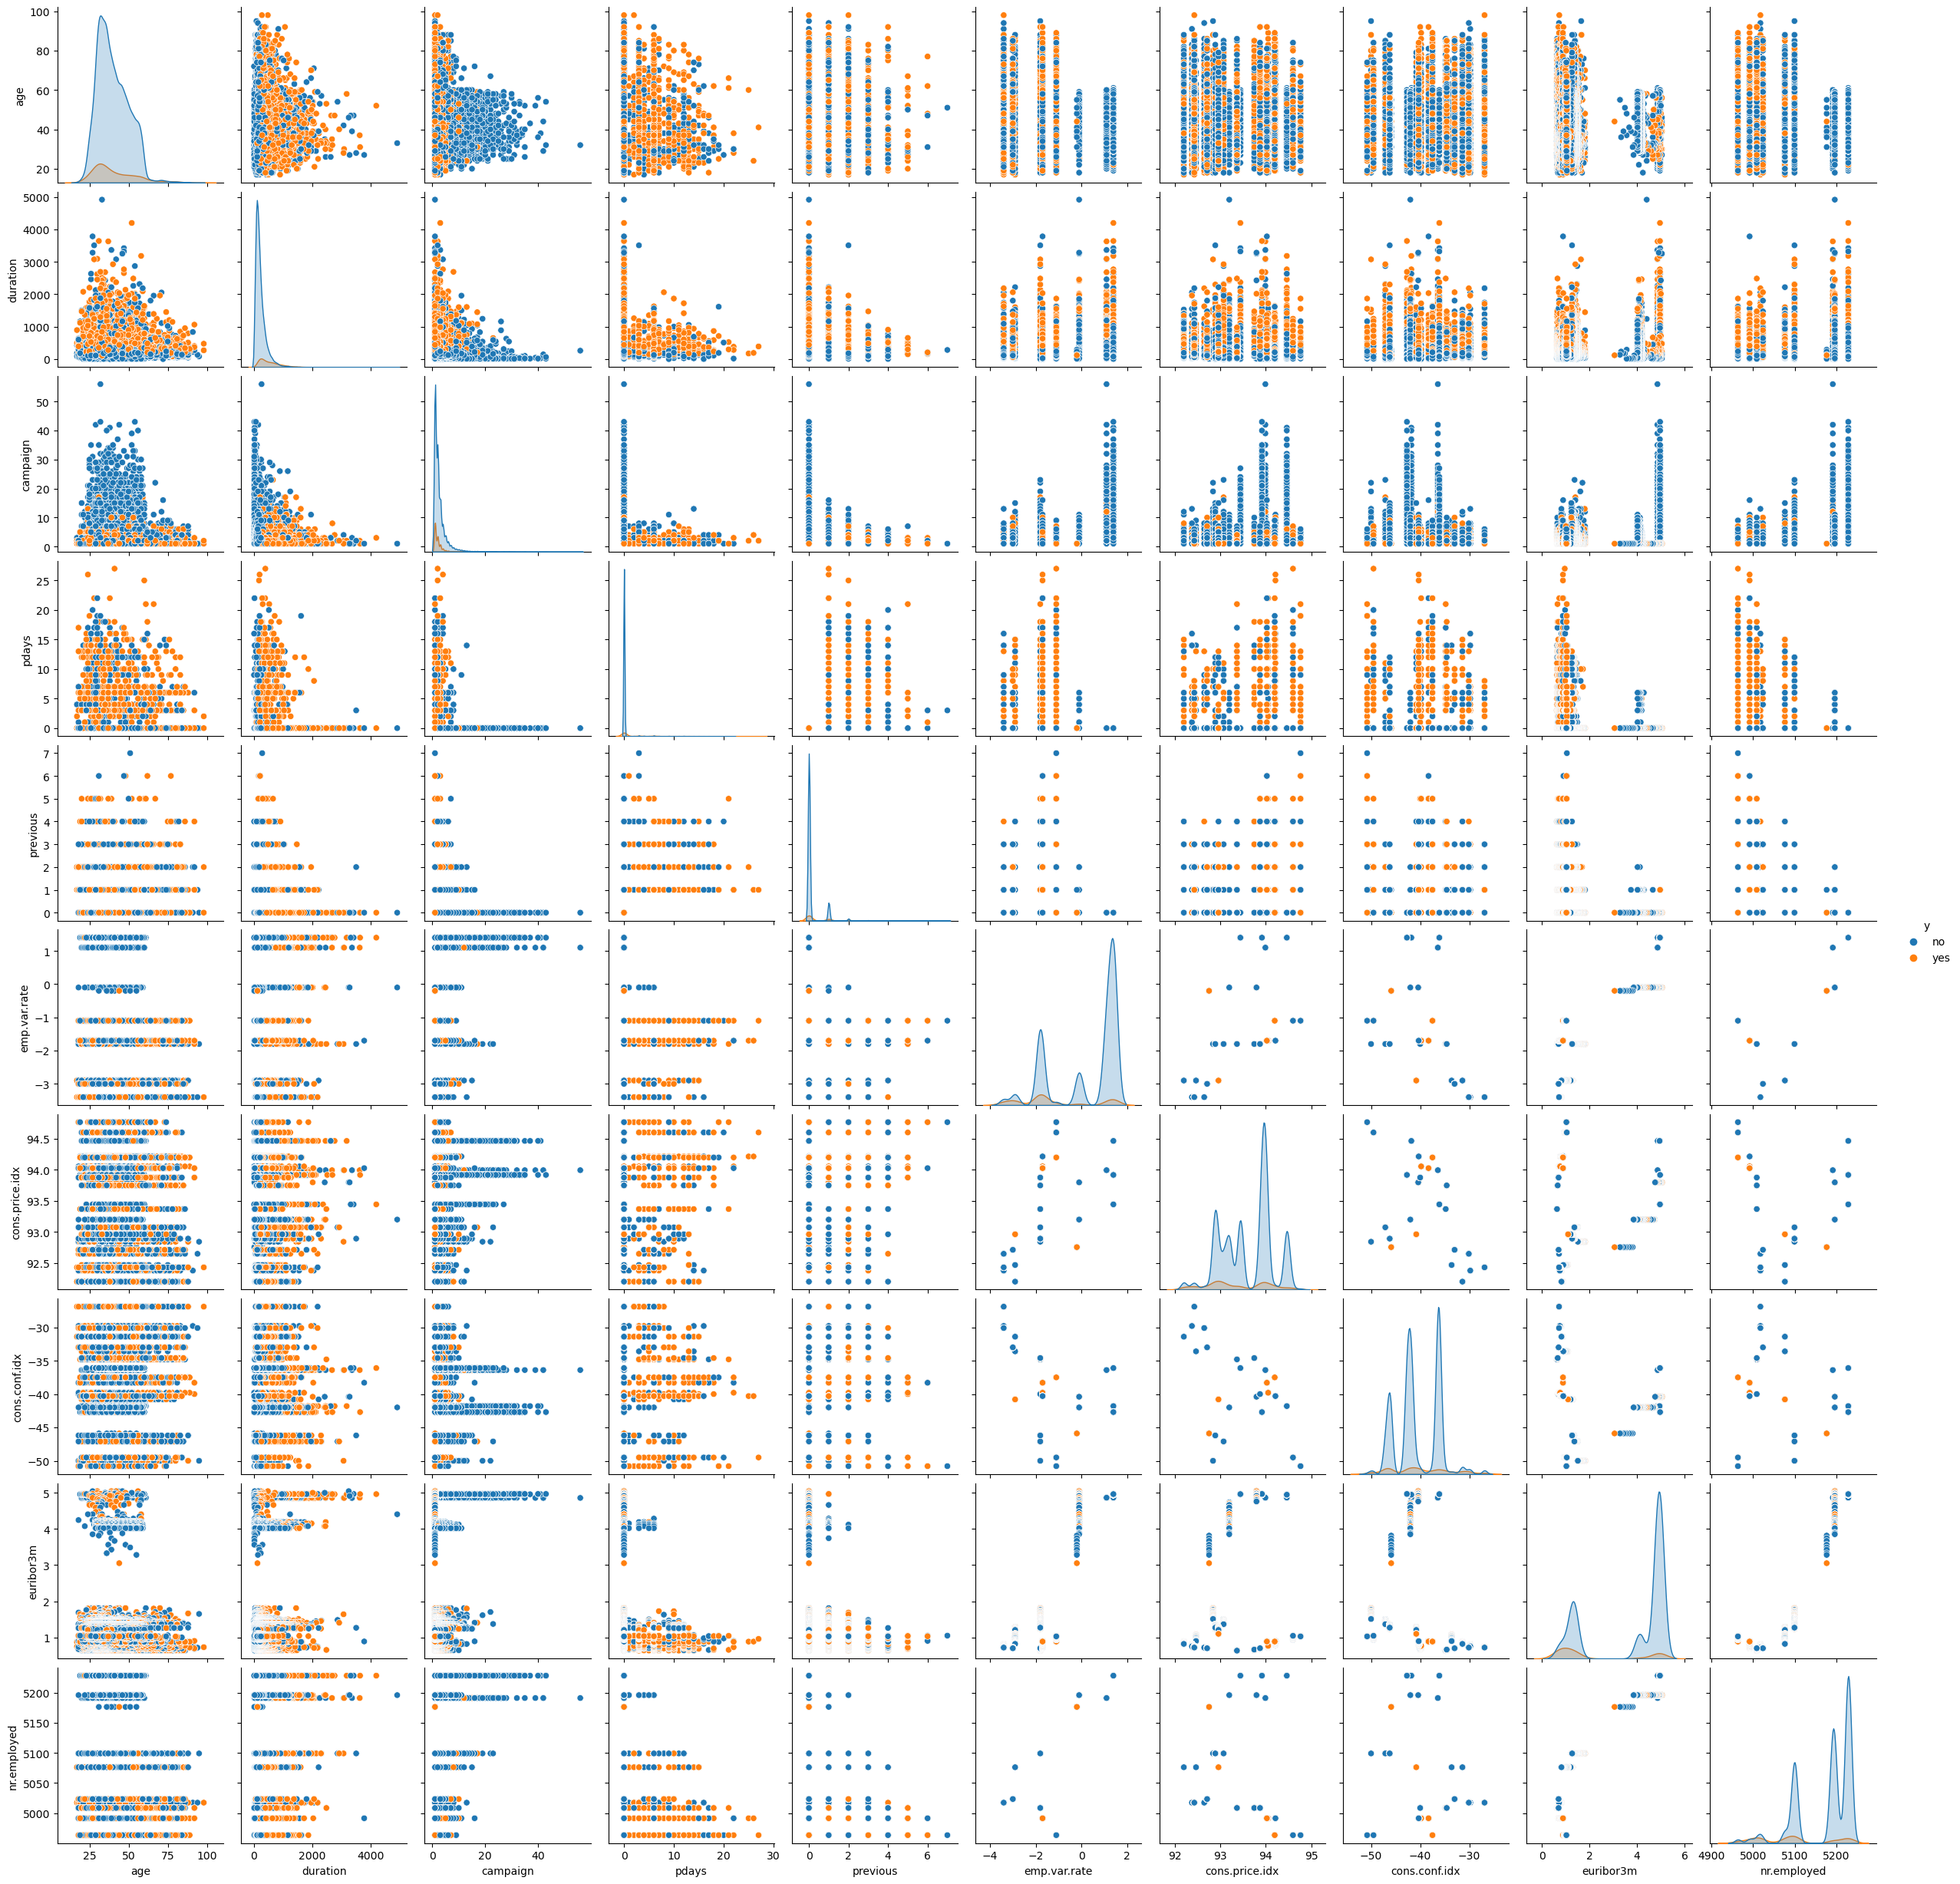

In [78]:
sns.pairplot(df,hue='y',diag_kind='kde')

In [79]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [80]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [81]:
std = StandardScaler()
std

StandardScaler()

In [82]:
for i in df.select_dtypes(exclude=['object']):
      df[i] = std.fit_transform(df[[i]])

In [83]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
421,0.285609,entrepreneur,married,basic.4y,no,no,no,telephone,may,tue,1.406406,-0.565963,-0.164037,-0.349551,nonexistent,0.648101,0.722628,0.886568,0.712463,0.331695,no
14837,-0.769998,blue-collar,married,basic.6y,no,yes,no,cellular,jul,wed,-0.413864,-0.565963,-0.164037,-0.349551,nonexistent,0.839079,0.591329,-0.474769,0.770119,0.845186,no
9639,-1.057890,blue-collar,married,basic.4y,no,no,yes,telephone,jun,mon,-0.363729,-0.565963,-0.164037,-0.349551,nonexistent,0.839079,1.536336,-0.280292,0.772425,0.845186,no
40806,-0.482105,technician,married,professional.course,no,yes,no,cellular,sep,thu,0.727661,-0.565963,-0.164037,3.691192,failure,-0.752402,1.076789,0.648874,-1.581681,-2.815689,no
10444,0.765430,unemployed,divorced,basic.4y,no,no,yes,telephone,jun,mon,-0.537272,-0.204990,-0.164037,-0.349551,nonexistent,0.839079,1.536336,-0.280292,0.771849,0.845186,no


In [84]:
df1= df.copy()

In [85]:
df = pd.get_dummies(df,columns=['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome'])

In [86]:
df.shape

(41176, 59)

## Model building

In [104]:
X = df.drop('y',axis=1)
y=df['y']

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Logistic Regression

In [89]:
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

LogisticRegression()

In [90]:
model_1.score(X_train,y_train)

0.9125698227110294

In [91]:
model_1.score(X_test,y_test)

0.9087671011090424

In [92]:
predictions1 = model_1.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

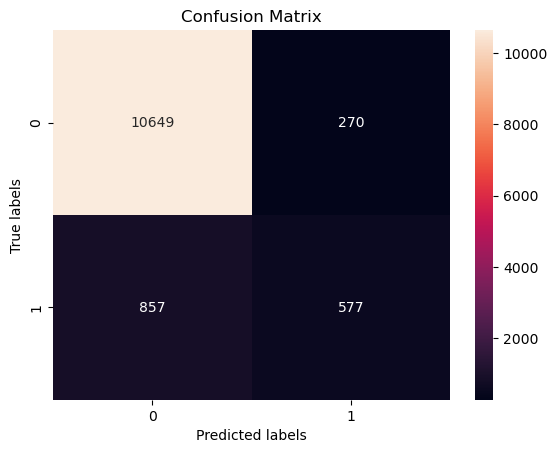

In [93]:
cm = confusion_matrix(y_test, predictions1)

sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [94]:
accuracy_score(y_test,predictions1)

0.9087671011090424

In [95]:
print(metrics.classification_report(y_test,predictions1))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95     10919
         yes       0.68      0.40      0.51      1434

    accuracy                           0.91     12353
   macro avg       0.80      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353



## KNN Classifier

In [96]:
model_2 = KNeighborsClassifier(n_neighbors=11)
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [97]:
model_2.score(X_train,y_train)

0.9204454775699962

In [98]:
model_2.score(X_test,y_test)

0.9038290293855743

In [99]:
predictions2 = model_2.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

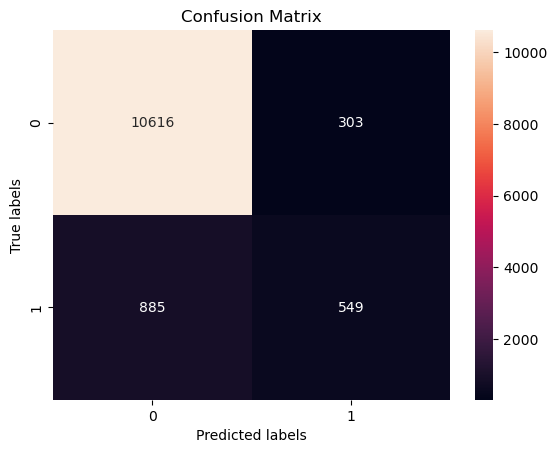

In [100]:
cm = confusion_matrix(y_test, predictions2)

sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# SVM classifier

In [45]:
model_3 = SVC()
model_3.fit(X_train,y_train)

SVC()

In [46]:
model_3.score(X_train,y_train)

0.9234639003573535

In [47]:
model_3.score(X_test,y_test)

0.9094147170727759

In [48]:
predictions3 = model_3.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

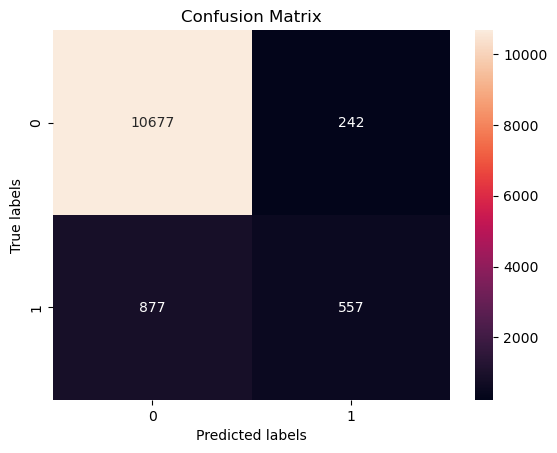

In [49]:
cm = confusion_matrix(y_test, predictions3)

sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [112]:
model_4 = SVC(kernel='poly',C=3.0)
model_4.fit(X_train,y_train)

SVC(C=3.0, kernel='poly')

In [113]:
model_4.score(X_train,y_train)

0.9405682961523784

In [114]:
model_4.score(X_test,y_test)

0.9077956771634421

In [115]:
predictions3 = model_4.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

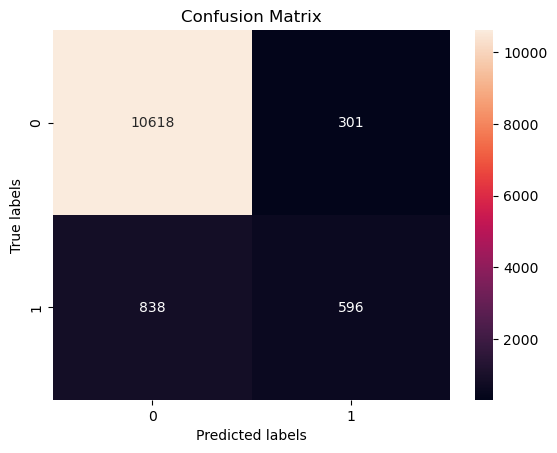

In [116]:
cm = confusion_matrix(y_test, predictions3)

sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')